C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Instancias e atributos
(214, 11)

Resultados baseados em Holdout 70/30
Taxa de acerto = 0.78 
Matriz de confusao:
[[17  2  1  0  0  1]
 [ 1 16  3  0  1  2]
 [ 2  0  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  8]]

Resultados baseados em Validacao Cruzada
Qtde folds: 10:
Taxa de Acerto: 0.59
Desvio padrao: 0.12
Matriz de confusao:
[[42 21  7  0  0  0]
 [14 43  9  3  1  6]
 [ 2  7  8  0  0  0]
 [ 0  3  0 10  0  0]
 [ 0  2  0  0  6  1]
 [ 1  4  0  2  0 22]]

Arvore gerada no experimento baseado em Holdout


C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


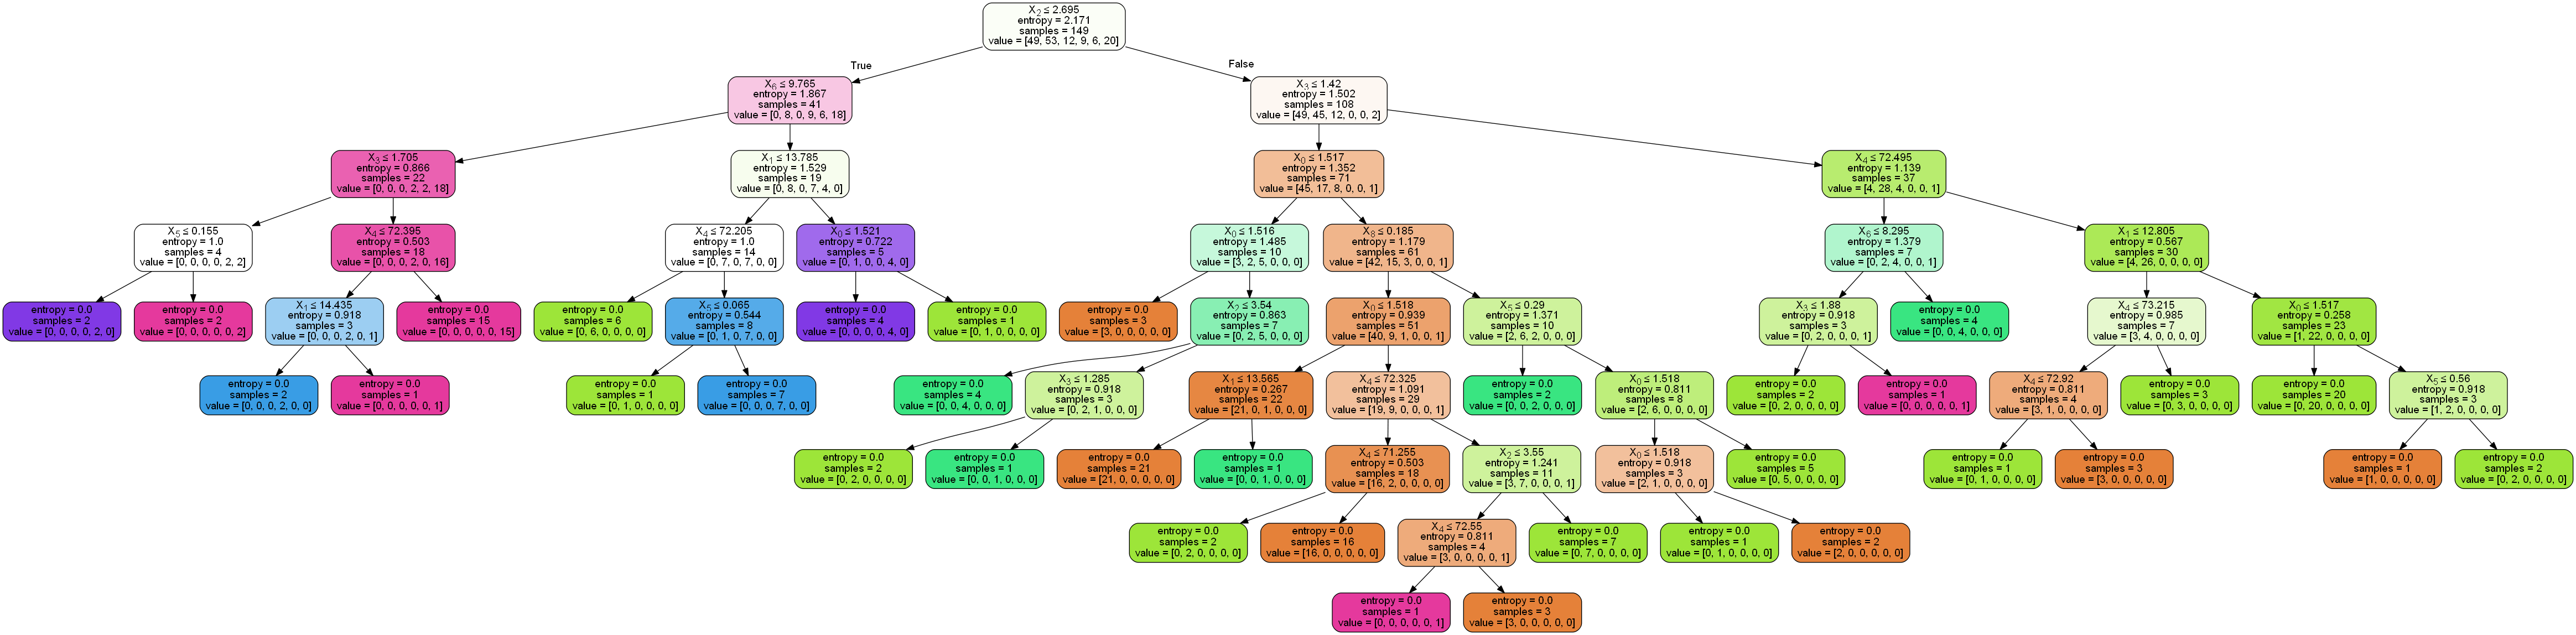

In [1]:
#  Este exemplo carrega a base Glass da UCI, treina uma Arvore de decisao usando 
#  holdout e outra usando validacao cruzada com 10 pastas. 

# Importa bibliotecas necessarias 
import numpy as np
import urllib
from sklearn import tree
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from IPython.display import display
import pydotplus


#from sklearn.model_selection import StratifiedShuffleSplit
# Carrega uma base de dados do UCI
# Exemplo carrega a base Glass
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
raw_data = urllib.request.urlopen(url)

# Carrega arquivo como uma matriz
dataset = np.loadtxt(raw_data, delimiter=",")

# Imprime quantide de instancias e atributos da base
print("Instancias e atributos")
print(dataset.shape)

# Coloca em X os 10 atributos de entrada e em y as classes
# Observe que na base Wine a classe eh primeiro atributo 
X = dataset[:,1:10]
y = dataset[:,10]

# EXEMPLO USANDO HOLDOUT
# Holdout -> dividindo a base em treinamento (70%) e teste (30%), estratificada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)

# declara o classificador
clfa = tree.DecisionTreeClassifier(criterion='entropy')

# treina o classificador
clfa = clfa.fit(X_train, y_train)

# testa usando a base de testes
predicted=clfa.predict(X_test)

# calcula a acuracia na base de teste (taxa de acerto)
score=clfa.score(X_test, y_test)

# calcula a matriz de confusao
matrix = confusion_matrix(y_test, predicted)

# apresenta os resultados
print("\nResultados baseados em Holdout 70/30")
print("Taxa de acerto = %.2f " % score)
print("Matriz de confusao:")
print(matrix)

# EXEMPLO USANDO VALIDACAO CRUZADA
clfb = tree.DecisionTreeClassifier(criterion='entropy')
folds=10
result = model_selection.cross_val_score(clfb, X, y, cv=folds)

print("\nResultados baseados em Validacao Cruzada")
print("Qtde folds: %d:" % folds)
print("Taxa de Acerto: %.2f" % result.mean())
print("Desvio padrao: %.2f" % result.std())

# matriz de confusão da validacao cruzada
Z = model_selection.cross_val_predict(clfb, X, y, cv=folds)
cm=confusion_matrix(y, Z)
print("Matriz de confusao:")
print(cm)

#imprime a arvore gerada
print("\nArvore gerada no experimento baseado em Holdout")
dot_data = StringIO()
export_graphviz(clfa, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
im=Image(graph.create_png())
display(im)





### Relatório

#### A base contém 214 instâncias, 10 atributos de entrada (X), um atributo de classe (tipo de vidro),
#### que pode ser classificado em valores inteiros que variam entre 1 e 7(assumem INCLUSIVE os 
#### valores 1 e 7).

#### Segundo o site da UCI, os valores significam:
#### 1 - building_windows_float_processed
#### 2 - building_windows_non_float_processed
#### 3 - vehicle_windows_float_processed
#### 4 - vehicle_windows_non_float_processed (none in this database)
#### 5 - containers
#### 6 - tableware
#### 7 - headlamps
#### Conforme mencionado, no database, não há nenhum com valor "4".

#### A taxa de acerto do Holdout foi de: 0.78, considerando o uso do parâmetro test_size = 0.3. Já para
#### a validação cruzada, a taxa de acerto foi de: 0.59, com desvio padrão de 0.12 e 10 folds.

#### Na diagonal principal das matrizes de confusão, estão os acertos. Nas demais posições, as "confusões".
#### A classe que apresenta a maior quantidade de erros em números absolutos foi a classe 2, com
#### 07 confusões na Holdout e 33 na validação cruzada.

#### No holdout, a maior confusão (em termos absolutos) está entre a classe 2 e a classe 3 (3 confusões).
#### Na validação cruzada, a maior confusão (em termos absolutos), está entre a classe 1 e a classe 2 (21 confusões)

#### Resumidamente, importamos as bibliotecas necessárias, carregamos a base de dados, carregamos como matriz, usamos o
#### comando "shape" para retonar a quantidade de instâncias e atributos. Em seguida, separamos os atributos de entrada e atri-
#### buímos a uma varíavel, dá mesmo forma foi feito com o atributo classe.

#### Posteriormente, dividimos a base em "treinamento e teste", usando um parcentual de 70% e 30%, respectivamente.

#### Em seguida, foi declarado e treinado o classificador. O classificador foi testado na base de teste e medido a taxa de
#### acerto. Também foi exibida a matriz de confusão para cada protocolo experimental.

#### Finalmente, foram apresentados os resultados e a árvore gerada.




In [6]:
# Constando que não existe registro com o valor "4" no atributo classe
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
